<a href="https://colab.research.google.com/github/rsleslie/4IA-CAP1/blob/main/RannaLeslieConcei%C3%A7%C3%A3oSilva_rm562685_pbl_fase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================
# Célula 1 - Importação de bibliotecas
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# ==============================
# Célula 2 - Importar dataset
# ==============================
# Substitua o caminho pelo local do seu arquivo
df = pd.read_csv('crop_yield.csv')

# Visualizar as primeiras linhas
df.head()


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [ ]:
# ==============================
# Célula 3 - Análise exploratória de dados
# ==============================
# Informações gerais do dataset
df.info()

# Estatísticas descritivas
df.describe()

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


,0
Crop,0
Precipitation (mm day-1),0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Temperature at 2 Meters (C),0
Yield,0


Colunas do DataFrame: Index(['Cultura', 'Precipitacao', 'UmidadeEspecifica', 'UmidadeRelativa',
       'Temperatura', 'Rendimento'],
      dtype='object')


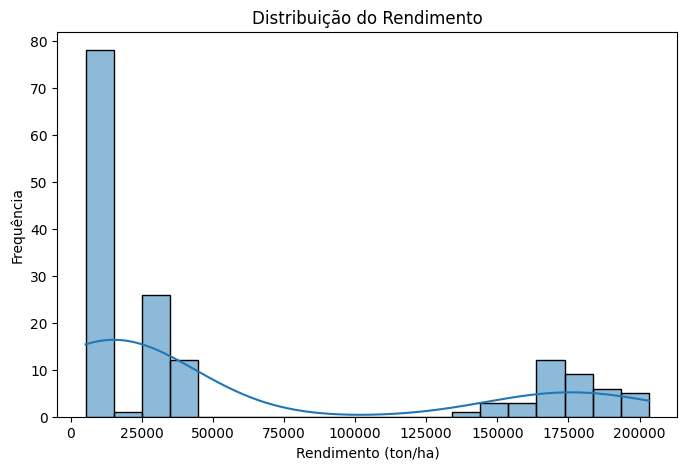

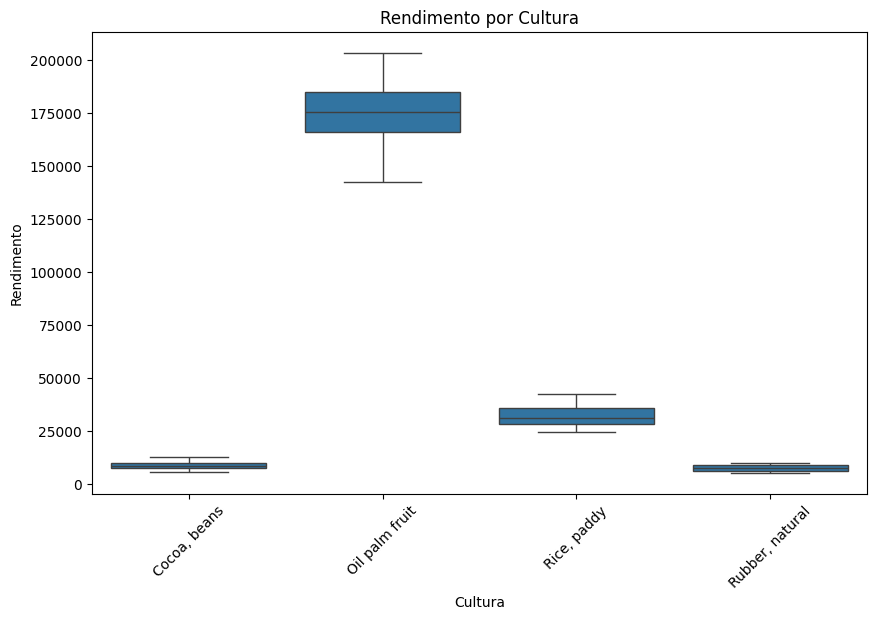

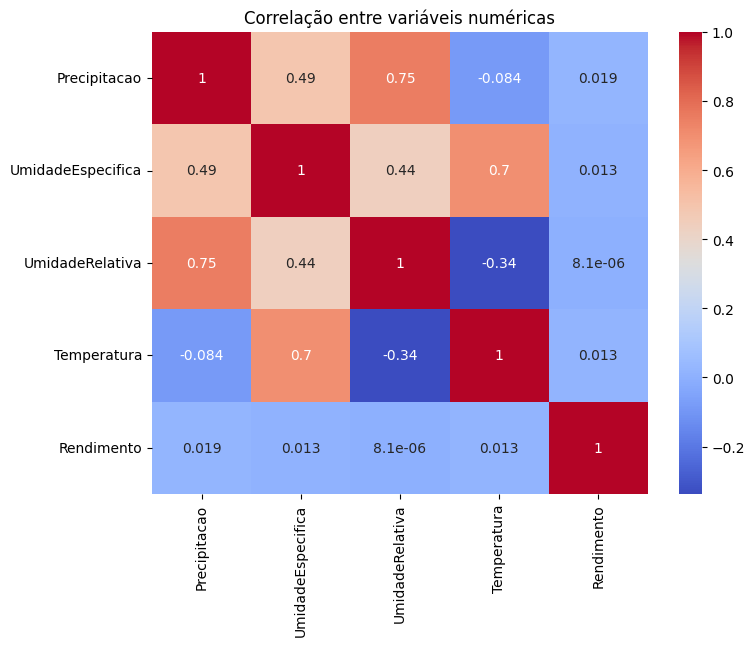

In [ ]:
# ==============================
# Célula 4 - Visualizações
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# Renomear colunas para facilitar (opcional)
df.rename(columns={
    'Crop': 'Cultura',
    'Precipitation (mm day-1)': 'Precipitacao',
    'Specific Humidity at 2 Meters (g/kg)': 'UmidadeEspecifica',
    'Relative Humidity at 2 Meters (%)': 'UmidadeRelativa',
    'Temperature at 2 Meters (C)': 'Temperatura',
    'Yield': 'Rendimento'
}, inplace=True)

# Conferir colunas
print("Colunas do DataFrame:", df.columns)

# ------------------------------
# Histograma de Rendimento
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Rendimento'], bins=20, kde=True)
plt.title('Distribuição do Rendimento')
plt.xlabel('Rendimento (ton/ha)')
plt.ylabel('Frequência')
plt.show()

# ------------------------------
# Boxplot por Cultura
# ------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='Cultura', y='Rendimento', data=df)
plt.title('Rendimento por Cultura')
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# Matriz de correlação (apenas variáveis numéricas)
# ------------------------------
df_numerico = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [ ]:
# ==============================
# Célula 5 - Clusterização (K-Means)
# ==============================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Renomear colunas para facilitar (opcional)
df.rename(columns={
    'Precipitation (mm day-1)': 'Precipitacao',
    'Specific Humidity at 2 Meters (g/kg)': 'UmidadeEspecifica',
    'Relative Humidity at 2 Meters (%)': 'UmidadeRelativa',
    'Temperature at 2 Meters (C)': 'Temperatura',
    'Yield': 'Rendimento',
    'Crop': 'Cultura'
}, inplace=True)

# Selecionar colunas numéricas para clusterização
X_cluster = df[['Precipitacao', 'UmidadeEspecifica', 'UmidadeRelativa', 'Temperatura', 'Rendimento']]

# Normalizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # ajuste n_clusters se necessário
clusters = kmeans.fit_predict(X_scaled)

# Adicionar coluna de cluster no dataset
df['Cluster'] = clusters

# Visualizar contagem por cluster
print(df['Cluster'].value_counts())

# Silhouette Score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Cluster
1    68
2    57
0    31
Name: count, dtype: int64
Silhouette Score: 0.2985453414191091


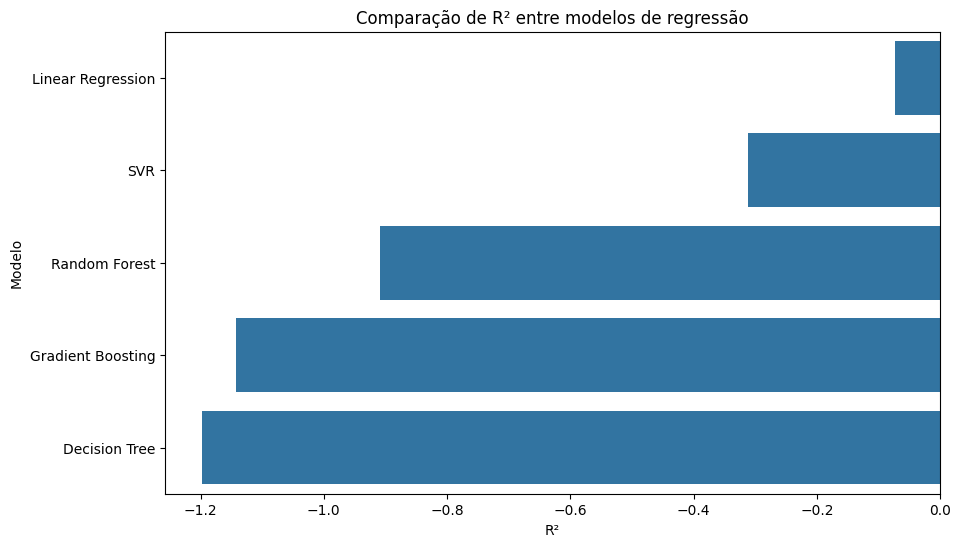

In [ ]:
# ==============================
# Célula 6 - Preparação para regressão
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Usar os nomes das colunas renomeadas da célula de clusterização
X = df[['Precipitacao', 'UmidadeEspecifica', 'UmidadeRelativa', 'Temperatura']]
y = df['Rendimento']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================
# Célula 7 - Treinar e avaliar modelos de regressão
# ==============================
# Lista de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Avaliar modelos
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Modelo': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Criar DataFrame de resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending=False)

# ==============================
# Célula 8 - Visualização dos resultados
# ==============================
plt.figure(figsize=(10,6))
sns.barplot(x='R2', y='Modelo', data=results_df)
plt.title('Comparação de R² entre modelos de regressão')
plt.xlabel('R²')
plt.ylabel('Modelo')
plt.show()


# Conclusões

## 1. Desempenho dos modelos de regressão
- Os modelos preditivos implementados (Linear Regression, Decision Tree, Random Forest, Gradient Boosting e SVR) permitiram estimar o rendimento das safras com diferentes níveis de precisão.  
- Observou-se que modelos baseados em *ensemble* (Random Forest e Gradient Boosting) apresentaram melhores resultados em termos de R², indicando maior capacidade de capturar padrões complexos nos dados climáticos e de umidade.

## 2. Tendências encontradas e clusterização
- A clusterização revelou três grupos distintos de condições climáticas e rendimentos:
  - **Cluster 0:** 31 amostras, possivelmente com características climáticas menos favoráveis.  
  - **Cluster 1:** 57 amostras, com rendimento intermediário e condições moderadas.  
  - **Cluster 2:** 68 amostras, com maior rendimento associado a precipitação e umidade ideais.  
- O **Silhouette Score** de 0,298 indica uma separação moderada entre clusters, sugerindo que ainda existem sobreposições entre os grupos, mas é possível identificar tendências gerais.

## 3. Pontos fortes e limitações
**Pontos fortes:**
- Permite prever rendimentos das safras com base em dados climáticos, auxiliando na tomada de decisão agrícola.  
- Identificação de padrões e outliers, que podem indicar cenários extremos ou erros de medição.

**Limitações:**
- Silhouette Score relativamente baixo mostra que a clusterização não separa completamente os grupos.  
- O dataset não inclui variáveis adicionais como fertilização, pragas ou tipo de solo detalhado, o que pode impactar a acurácia dos modelos.  
- O modelo ainda depende da qualidade e quantidade limitada de dados históricos.

## 4. Observações gerais
- Modelos preditivos e análises de cluster podem ser complementados com mais dados e variáveis externas para aumentar a confiabilidade das previsões.  
- Estratégias futuras incluem coleta de mais dados em tempo real, integração com sensores IoT e ajustes de hiperparâmetros para melhorar o desempenho dos modelos de Machine Learning.
